In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import numpy as np
from collections import Counter
from statsmodels.distributions.empirical_distribution import ECDF

In [13]:
test = [1,2,3,4,1,2,3,1,2,3,4,5,1,2,3,4,1,2,3,4,5,6,1,2,2,2,2,3,6,6,6,6,6,7]

counts, bins = np.histogram(test, bins=np.arange(min(test),max(test)+2))


In [14]:
Counter(test) # Counts occurrences

Counter({2: 9, 1: 6, 3: 6, 6: 6, 4: 4, 5: 2, 7: 1})

In [15]:
print(bins)
print(counts)

[1 2 3 4 5 6 7 8]
[6 9 6 4 2 6 1]


ValueError: weights should have the same shape as x

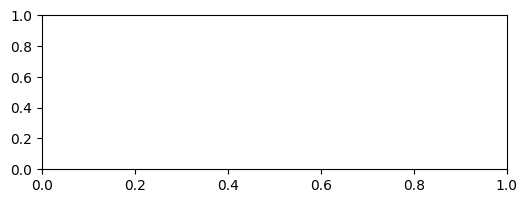

In [20]:
plt.figure(figsize = (6,2))
plt.hist(bins[:], bins, weights=counts, color = 'tomato')
plt.xticks([x+0.5 for x in range(1,max(test)+1)],range(1,max(test)+1))
plt.yticks(range(10))
plt.grid(True)
plt.show()

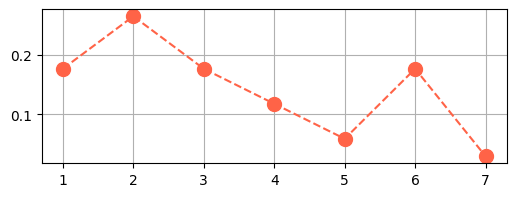

In [24]:
plt.figure(figsize = (6,2))
pdf_test = [c/len(test) for c in counts]
plt.plot(bins[:-1],pdf_test , color = 'tomato',marker='o', linestyle='--', ms=10)
plt.grid(True)
plt.show()

In [28]:
Fb = nx.Graph()
with open('../data/facebook/socfb-Stanford3.mtx') as f:
    # let's avoid the first two lines
    f.readline()
    f.readline()
    for line in f:
        a, b = line.strip().split()
        Fb.add_edge(int(a),int(b))

degree = dict(Fb.degree())
degree_list =list(degree.values())

In [29]:
np.arange(min(degree_list),max(degree_list)+1)
count,bins = np.histogram(degree_list, bins=np.arange(min(degree_list),max(degree_list)+2))

pdf_fb = count / Fb.order()

Text(0, 0.5, 'P(X=x)')

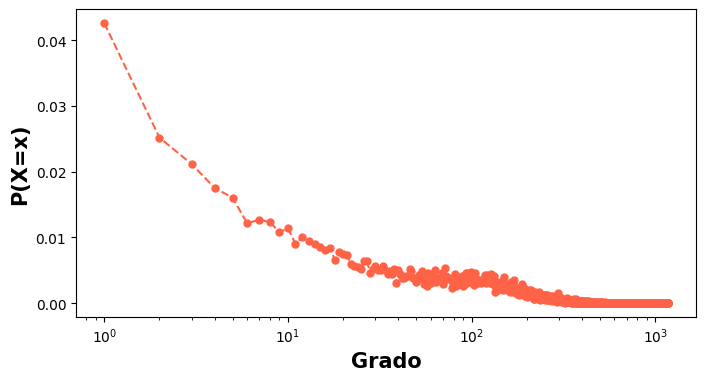

In [30]:
fig = plt.figure(figsize=(8,4))
plt.plot(bins[:-1],pdf_fb, color='tomato',marker='o', linestyle='--', ms=5)
plt.xscale('log')
plt.xlabel('Grado',size=15, weight = 'bold')
plt.ylabel('P(X=x)',size=15, weight = 'bold')


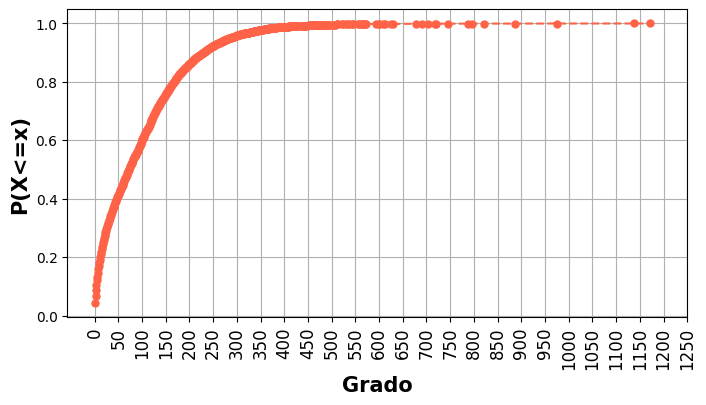

In [35]:
cdf_function = ECDF(degree_list)
x = np.unique(degree_list)
y = cdf_function(x)

# Visualizzazione
fig_cdf_function = plt.figure(figsize=(8,4))
assi = fig_cdf_function.gca()
#assi.loglog(x,y,color = 'red', linestyle = '--', marker= 'o',ms = 16)
assi.plot(x,y,color = 'tomato', linestyle = '--', marker= 'o',ms = 5)
assi.set_xlabel('Grado',size=15, weight = 'bold')
assi.set_ylabel('P(X<=x)',size=15, weight = 'bold')
assi.set_xticks(range(0,1300,50),range(0,1300,50),size = 12, rotation = 90)
plt.grid()

In [36]:
n_nodi = Fb.order()
density = nx.density(Fb)
random_graph = nx.fast_gnp_random_graph(n_nodi,density)

In [37]:
print("Facebook")
print('--Number of nodes: {}'.format(Fb.order()))
print('--Number of links: {}'.format(Fb.size()))
print("Erdos-Renyi")
print('--Number of nodes: {}'.format(random_graph.order()))
print('--Number of links: {}'.format(random_graph.size()))

Facebook
--Number of nodes: 11586
--Number of links: 568309
Erdos-Renyi
--Number of nodes: 11586
--Number of links: 567965


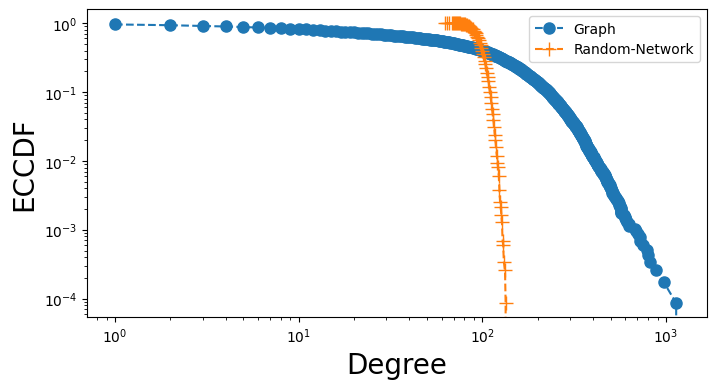

In [38]:
random_degree = list(dict(random_graph.degree()).values())
degree = list(dict(Fb.degree()).values())
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--',label='Graph')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--',label='Random-Network')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)
axes.legend()

In [39]:
random_graphs = []
for _ in range(10):
    random_graphs.append(nx.fast_gnp_random_graph(n_nodi,density))
random_degrees = []
for i in range(10):
    random_degrees.append(np.mean(list(dict(random_graphs[i].degree()).values())))
#random_degrees

In [40]:
grado_medio_Fb = np.mean(list(dict(Fb.degree()).values()))

print(f'REAL degree medio: {grado_medio_Fb}')
print(f'NULL degree medio : {np.mean(random_degrees)}')

REAL degree medio: 98.10271016744346
NULL degree medio : 98.0682375280511


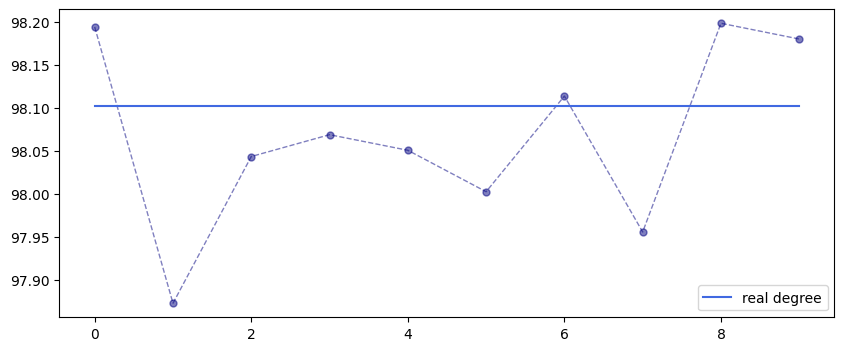

In [41]:
plt.figure(figsize = (10,4))
plt.plot(random_degrees, '.--', ms = 10,lw =1, color = 'navy', alpha = 0.5)
plt.plot([grado_medio_Fb]*10, color = 'royalblue', label = 'real degree')

plt.legend()

In [42]:
random_median = []
for i in range(10):
    random_median.append(np.median(list(dict(random_graphs[i].degree()).values())))
#random_degrees

In [44]:
real_median = np.median(list(dict(Fb.degree()).values()))
print(f'REAL median degree: {real_median}')
print(f'NULL median degree: {np.mean(random_median)}')

# La Mediana discosta molto, poiché assume valori molto diversi in una Distribuzione Poissoniana rispetto ad una Power Law

REAL median degree: 73.0
NULL median degree: 98.0


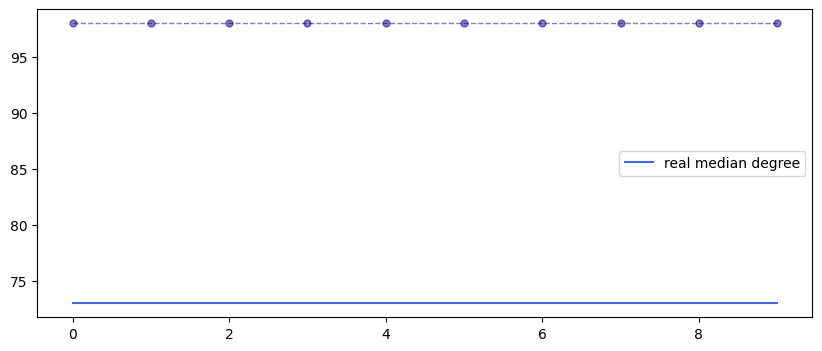

In [45]:
plt.figure(figsize = (10,4))
plt.plot(random_median, '.--', ms = 10,lw =1, color = 'navy', alpha = 0.5)
plt.plot([real_median]*10, color = 'royalblue', label = 'real median degree')
plt.legend()